In [ ]:
# !pip install tensorflow

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [5]:
print(tf.__version__)

2.19.0


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/atula/Downloads/archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70597 files belonging to 28 classes.


In [3]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 28), dtype=tf.float32, name=None))>

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/atula/Downloads/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 42532 files belonging to 28 classes.


In [5]:
for x,y in training_set:
    print(x,y.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[230.       229.       224.      ]
   [229.       228.       223.      ]
   [229.       228.       223.      ]
   ...
   [206.75     205.75     201.75    ]
   [202.75     201.75     197.75    ]
   [155.75     154.75     151.75    ]]

  [[230.       229.       224.      ]
   [229.       228.       223.      ]
   [229.       228.       223.      ]
   ...
   [207.5      206.5      202.5     ]
   [203.       202.       198.      ]
   [ 57.25      56.25      54.25    ]]

  [[230.       229.       224.      ]
   [229.       228.       223.      ]
   [229.       228.       223.      ]
   ...
   [201.5      200.5      196.5     ]
   [157.75     156.75     152.75    ]
   [  2.         1.         0.      ]]

  ...

  [[222.5      221.5      216.5     ]
   [222.       221.       216.      ]
   [221.       220.       215.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[222.5      221.5      216.5   

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.models import Sequential


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\atula\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [17]:
cnn.add(tf.keras.layers.Dense(units=28,activation='softmax'))

In [18]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        42,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,827,752 (29.86 MB)

 Trainable params: 7,827,752 (29.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2207/2207 ━━━━━━━━━━━━━━━━━━━━ 1353s 611ms/step - accuracy: 0.5848 - loss: 1.3319 - val_accuracy: 0.9347 - val_loss: 0.2046
Epoch 2/10
2207/2207 ━━━━━━━━━━━━━━━━━━━━ 1786s 809ms/step - accuracy: 0.8982 - loss: 0.3030 - val_accuracy: 0.9656 - val_loss: 0.1002
Epoch 3/10
2207/2207 ━━━━━━━━━━━━━━━━━━━━ 1727s 783ms/step - accuracy: 0.9378 - loss: 0.1841 - val_accuracy: 0.9644 - val_loss: 0.0991
Epoch 4/10
2207/2207 ━━━━━━━━━━━━━━━━━━━━ 28934s 13s/step - accuracy: 0.9548 - loss: 0.1338 - val_accuracy: 0.9738 - val_loss: 0.0756
Epoch 5/10
2207/2207 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9663 - loss: 0.1005

In [174]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2207/2207 ━━━━━━━━━━━━━━━━━━━━ 245s 111ms/step - accuracy: 0.9889 - loss: 0.0305
Training accuracy: 0.9906936287879944


In [175]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 149s 112ms/step - accuracy: 0.9871 - loss: 0.0389
Validation accuracy: 0.9862926602363586


In [176]:
training_history.history 

{'accuracy': [0.6773092150688171,
  0.8948255777359009,
  0.9352238774299622,
  0.9543323516845703,
  0.9661316871643066,
  0.972633421421051,
  0.9781576991081238,
  0.9809907078742981,
  0.9854526519775391,
  0.985863447189331],
 'loss': [1.0024994611740112,
  0.3201138973236084,
  0.19747982919216156,
  0.14090478420257568,
  0.10452423989772797,
  0.08508957177400589,
  0.06804002821445465,
  0.06007755175232887,
  0.04603872820734978,
  0.04474436119198799],
 'val_accuracy': [0.9219176173210144,
  0.9633217453956604,
  0.9331797361373901,
  0.967930018901825,
  0.9780635833740234,
  0.9825307726860046,
  0.9858929514884949,
  0.9862691760063171,
  0.98161381483078,
  0.9862926602363586],
 'val_loss': [0.22915934026241302,
  0.10964402556419373,
  0.2679247558116913,
  0.10175397247076035,
  0.06664532423019409,
  0.05545497685670853,
  0.04397883638739586,
  0.04355226084589958,
  0.0625629797577858,
  0.0404348187148571]}

In [177]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [178]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


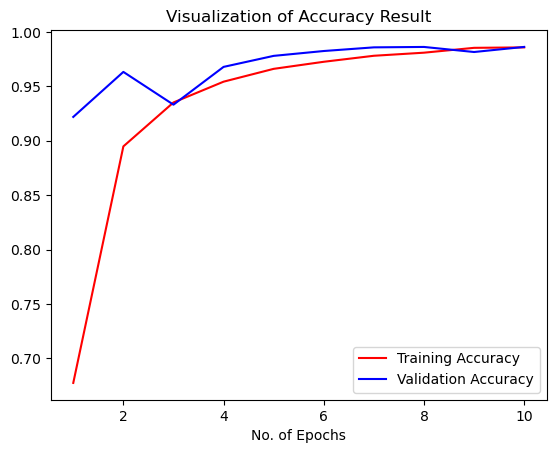

In [179]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [180]:
class_name = validation_set.class_names

In [181]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange_Citrus_Canker_Diseases_Leaf',
 'Orange_Citrus_Nutrient_Deficiency_Yellow_Leaf_Orange',
 'Orange_Healthy_Leaf',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Sugarcane__Healthy',
 'Sugarcane__Mosaic',
 'Sugarcane__RedRot',
 'Sugarcane__Rust',
 'Sugarcane__Yellow',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___healthy']

In [182]:
from tensorflow.keras.models import load_model
cnn.save('f&v_leaf_detection_model.keras')

In [183]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/atula/Downloads/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 42532 files belonging to 28 classes.


In [184]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 148s 111ms/step


In [185]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [186]:
Y_true

<tf.Tensor: shape=(42532,), dtype=int64, numpy=array([12, 12, 13, ..., 14, 12, 27], dtype=int64)>

In [187]:
predicted_categories

<tf.Tensor: shape=(42532,), dtype=int64, numpy=array([14, 14, 11, ..., 13, 12, 13], dtype=int64)>

In [188]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [49]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       504
                                 Apple___Black_rot       0.02      0.02      0.02       497
                          Apple___Cedar_apple_rust       0.04      0.04      0.04       440
                                   Apple___healthy       0.05      0.05      0.05       502
                               Blueberry___healthy       0.03      0.04      0.03       454
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       421
                 Cherry_(including_sour)___healthy       0.04      0.04      0.04       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.03      0.03      0.03       410
                       Corn_(maize)___Common_rust_       0.02      0.02      0.02       477
               Corn_(maize)___Northern_Leaf_Blight       0.02      0.03      0.

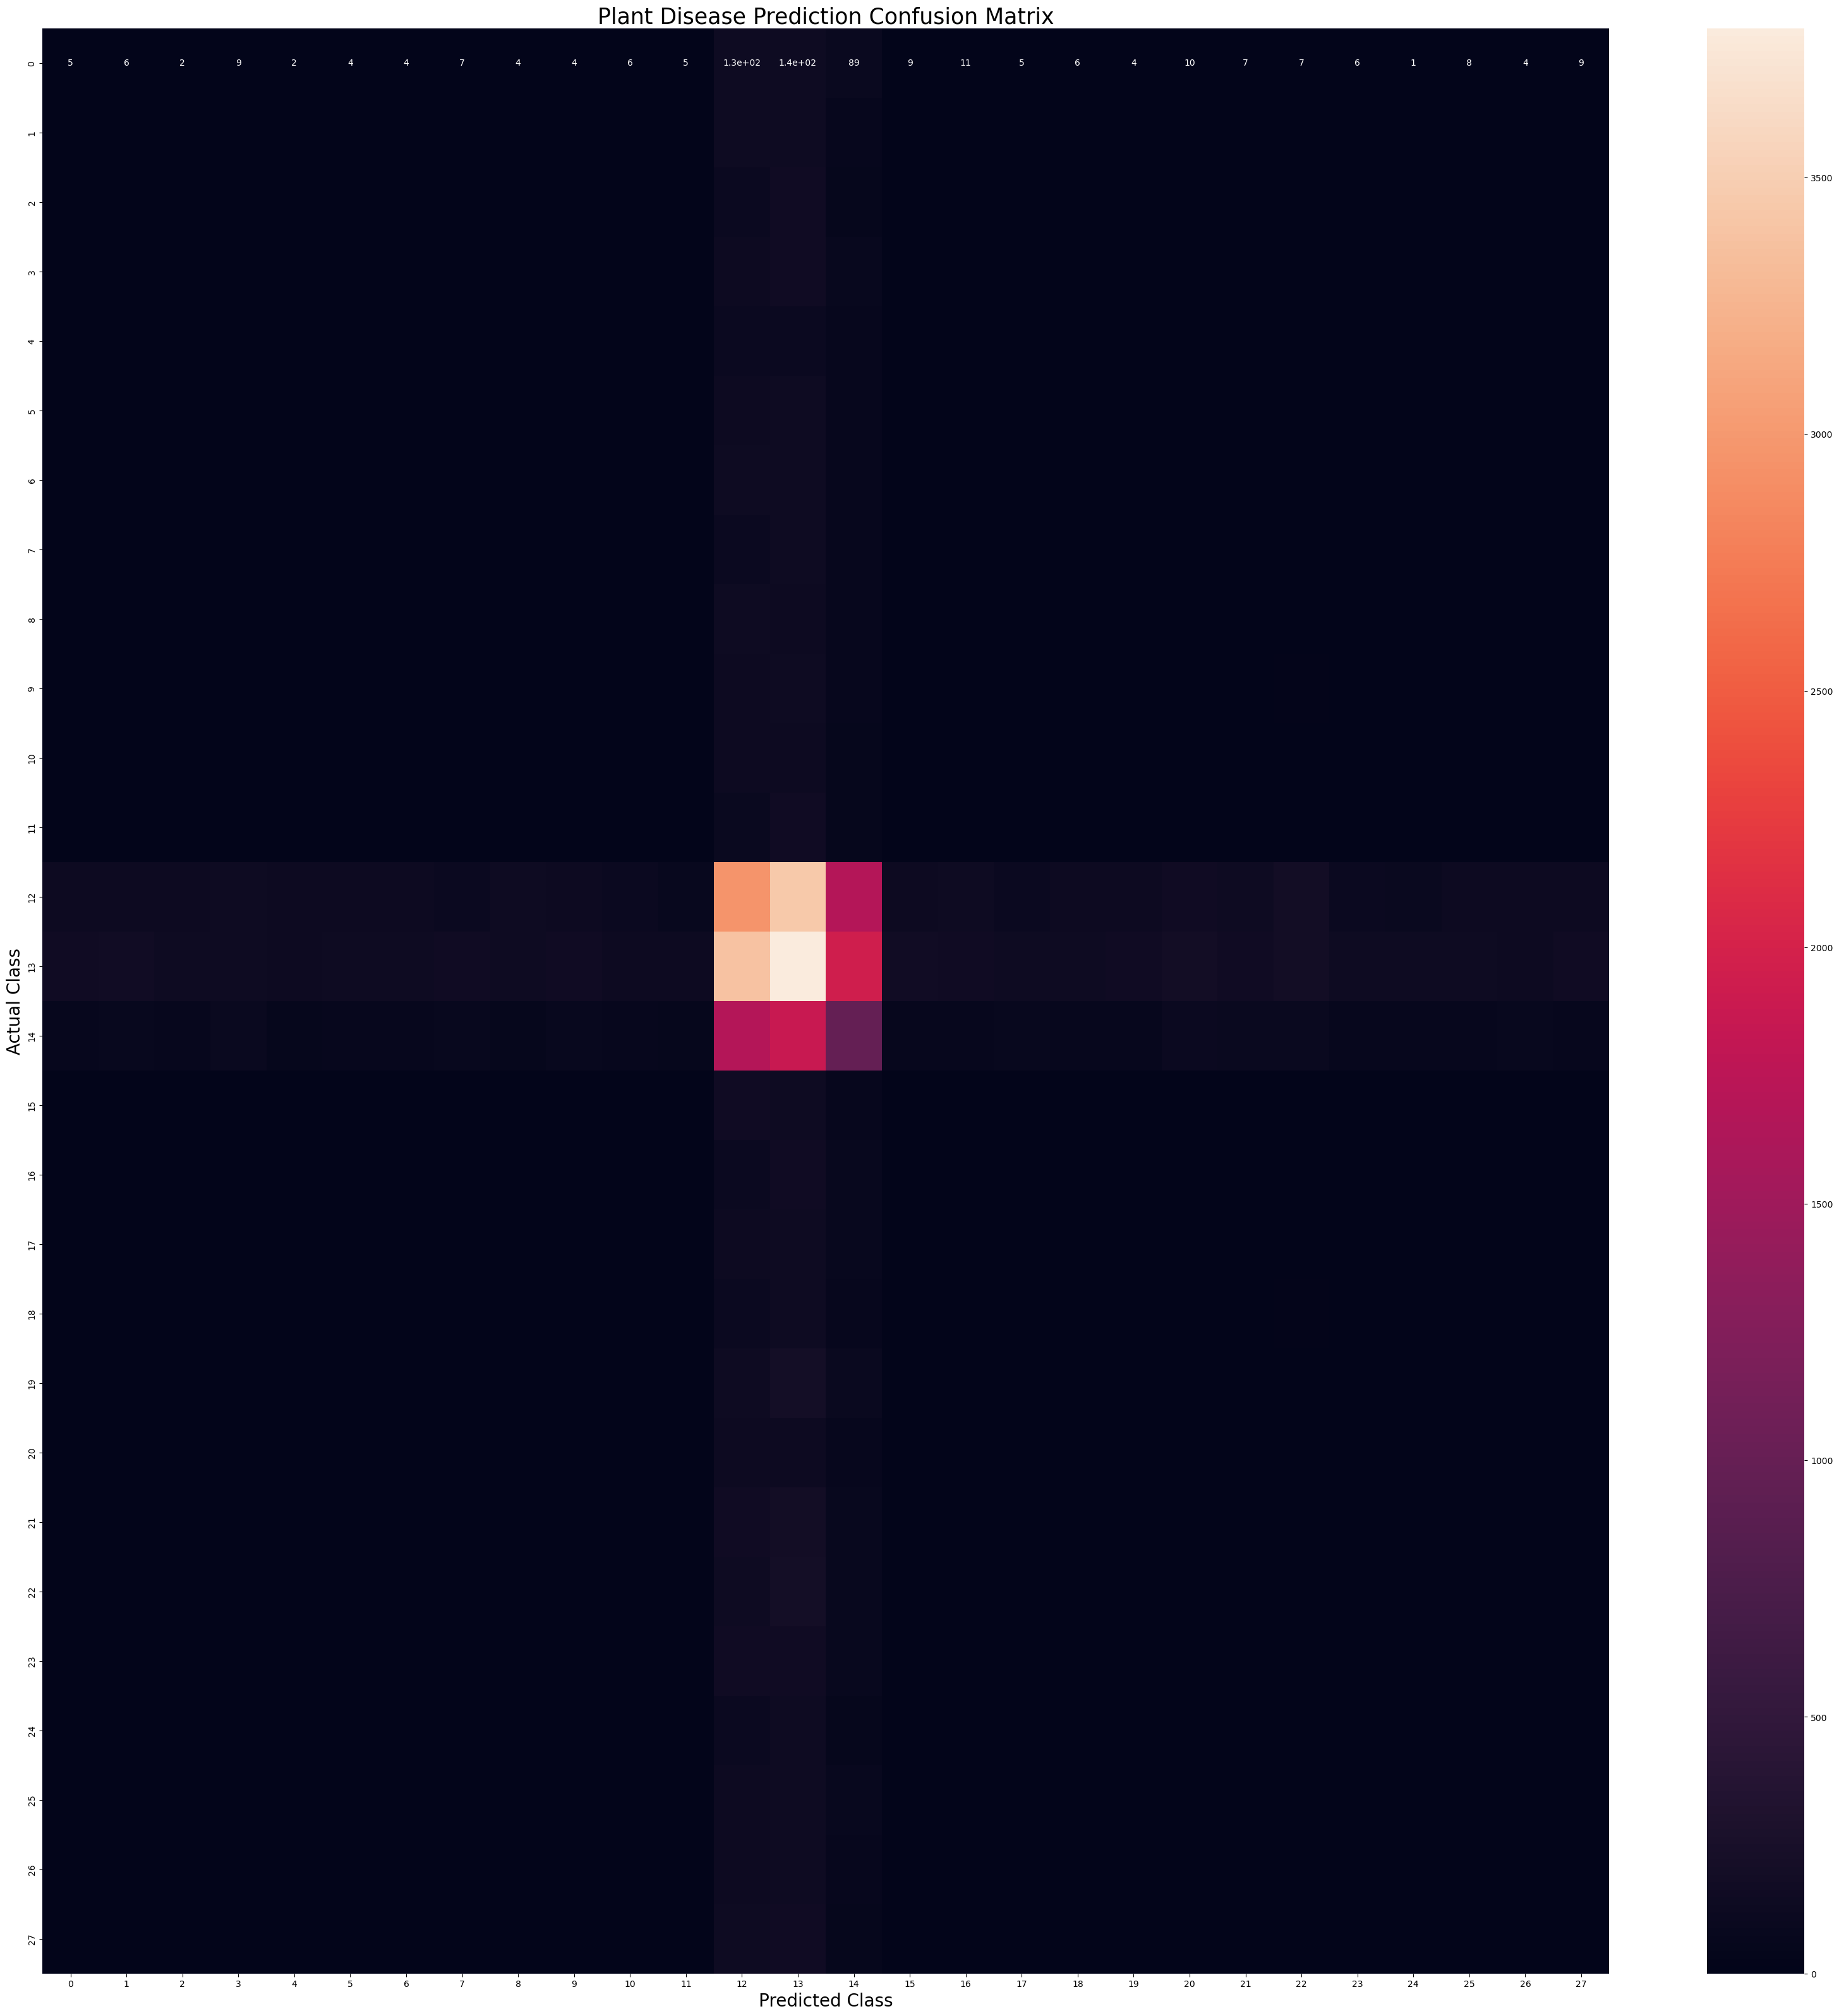

In [189]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()